# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format','{:.2f}'.format)

# Filenames with relative path to Load into pandas DataFrames 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride files into the DataFrames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the two DataFrames into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview of columns and example data
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#check for null values. I don't see any null values. I had too many drivers so I am trying to know why
pyber_data_df.isna().sum()  

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [4]:
# understand the types of data I can use for averages, counts, totals
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [5]:
#What does this look like so I can verify my later calculations - in the merged DataFrame, the driver_count is wrong 
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.00,2375.00,2375.00
mean,26.75,4887269653462.79,28.93
std,12.11,2907361287069.68,20.67
min,4.05,321833677.00,1.00
25%,17.19,2381174641606.50,11.00
50%,26.60,4748541004175.00,23.00
75%,36.65,7461936434736.00,45.00
max,58.55,9991537657885.00,73.00


In [6]:
# check for duplicates. there are none, so have to figure out why my count of drivers is wrong
pyber_data_df.duplicated().sum()


0

## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [7]:
#get total rides overall to be sure my next calculations will add up correctly for rides
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [8]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
#total drivers overall to be sure my next calculations add up right for drivers. had to reset index.
# using one of the original files I get the correct total of drivers 2973.
total_drivers = city_data_df.sum()["driver_count"]
total_drivers

2973

In [16]:
# 2. Get the total drivers for each city type using the merged dataset.
# pyber_data_df = pyber_data_df.reset_index()
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
# total amount of fare overall for checking
total_fare = pyber_data_df.sum()["fare"]
total_fare

63538.64

In [11]:
#  3. Get the total amount of fares for each city type
total_fare_amt_by_city_type =  pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_amt_by_city_type

type
Rural       4327.93
Suburban   19356.33
Urban      39854.38
Name: fare, dtype: float64

In [17]:
#  4. Get the average fare per ride for each city type.  
avg_fare_per_ride_by_city_type =  total_fare_amt_by_city_type /total_rides_by_city_type
avg_fare_per_ride_by_city_type


type
Rural      34.62
Suburban   30.97
Urban      24.53
dtype: float64

In [23]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_by_city_type = total_fare_amt_by_city_type /total_drivers_by_city_type
avg_fare_per_driver_by_city_type


type
Rural      55.49
Suburban   39.50
Urban      16.57
dtype: float64

In [24]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
          "Total Rides" : total_rides_by_city_type ,
          "Total Drivers": total_drivers_by_city_type ,
          "Total Fares": total_fare_amt_by_city_type,
          "Average Fare per Ride": avg_fare_per_ride_by_city_type,
          "Average Fare per Driver": avg_fare_per_driver_by_city_type})

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [25]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [26]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [33]:
# Print the merged DataFrame for reference.
merged_df = pyber_data_df.head()
merged_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [34]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_fares_df


type   date               
Rural  2019-01-01 09:45:36   43.69
       2019-01-02 11:18:32   52.12
       2019-01-03 19:51:01   19.90
       2019-01-04 03:31:26   24.88
       2019-01-06 07:38:40   47.33
                              ... 
Urban  2019-05-08 04:20:00   21.99
       2019-05-08 04:39:49   18.45
       2019-05-08 07:29:01   18.55
       2019-05-08 11:38:35   19.77
       2019-05-08 13:10:18   18.04
Name: fare, Length: 2375, dtype: float64

In [35]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_df = sum_fares_df.reset_index()

In [39]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_date = pyber_data_df.pivot(index ='date',columns = 'type', values = 'fare')
pivot_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [40]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
pivot_df = pivot_date.loc["2019-01-01":"2019-04-28"] 
pivot_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [42]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_df.index = pd.to_datetime(pivot_df.index)

In [43]:
# 6. Check that the datatype for the index is datetime using df.info()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [45]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_df = pivot_df.resample('W').sum()
pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


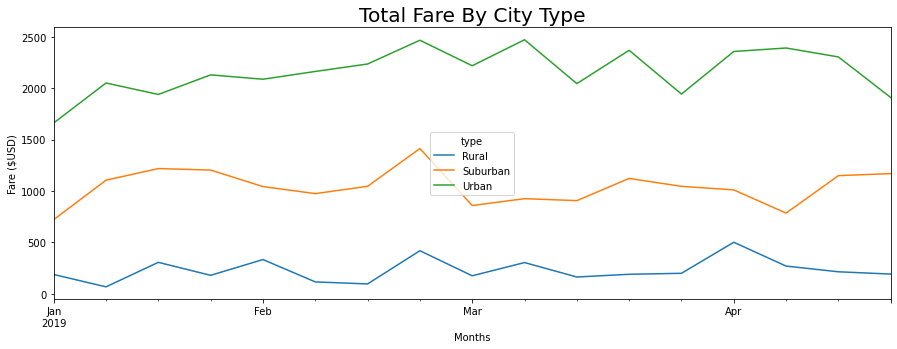

In [47]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pivot_df.plot(figsize = (15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("resources/PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')
